In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [83]:
heart = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [84]:
heart.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [85]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [86]:
heart.duplicated().sum()

272

In [87]:
heart_n = heart.drop_duplicates(keep='last')

In [88]:
heart_n.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [89]:
heart_n['cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: cholesterol, dtype: float64

C:\Users\prash\AppData\Local\Temp\ipykernel_3772\77351312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_n['cholesterol'])


<Axes: xlabel='cholesterol', ylabel='Density'>

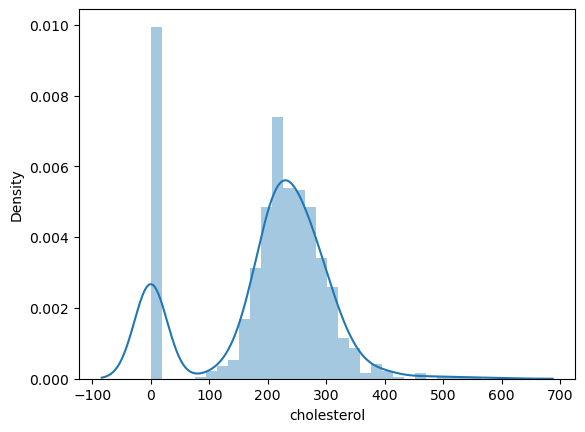

In [90]:
sns.distplot(heart_n['cholesterol'])

C:\Users\prash\AppData\Local\Temp\ipykernel_3772\2902821731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_n['oldpeak'])


<Axes: xlabel='oldpeak', ylabel='Density'>

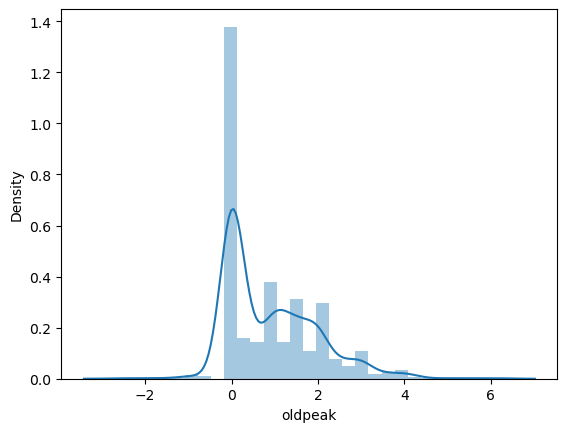

In [91]:
sns.distplot(heart_n['oldpeak'])

In [92]:
heart_n['oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [93]:
heart_n['oldpeak'].value_counts()

oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 2.6      7
 1.9      7
 1.1      7
 2.8      7
 0.7      7
 1.3      7
 1.7      6
 2.2      5
 3.6      4
 0.9      4
 2.4      4
 3.4      3
 3.2      2
 2.3      2
 3.5      2
 2.1      2
-0.5      2
 4.2      2
-1.0      2
-0.1      2
 3.8      1
 5.6      1
 3.1      1
 2.9      1
 6.2      1
-1.5      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

In [94]:
upper_limit = heart_n['oldpeak'].quantile(0.95)
upper_limit

3.0

In [95]:
lower_limit = heart_n['oldpeak'].quantile(0.05)
lower_limit

0.0

In [96]:
heart_n['oldpeak'] = np.where(heart_n['oldpeak'] >= upper_limit,
        upper_limit,
        np.where(heart_n['oldpeak'] <= lower_limit,
        lower_limit,
        heart_n['oldpeak']))

C:\Users\prash\AppData\Local\Temp\ipykernel_3772\934809436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_n['oldpeak'] = np.where(heart_n['oldpeak'] >= upper_limit,


C:\Users\prash\AppData\Local\Temp\ipykernel_3772\2902821731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_n['oldpeak'])


<Axes: xlabel='oldpeak', ylabel='Density'>

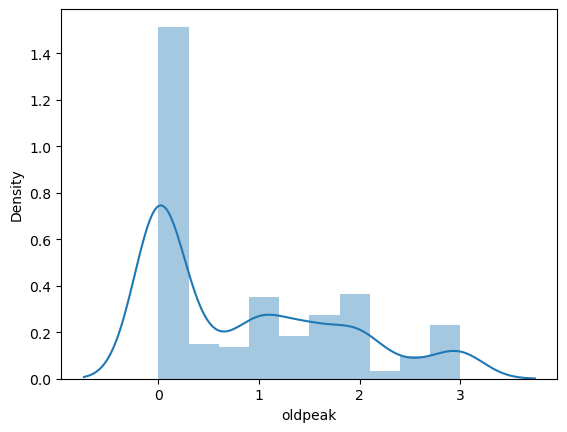

In [97]:
sns.distplot(heart_n['oldpeak'])

In [98]:
heart_n.shape

(918, 12)

In [99]:
X = heart_n.iloc[:, :-1]
Y = heart_n.iloc[:, -1]
Y.shape


(918,)

In [100]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=42)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(918, 11) (918,)
(734, 11) (734,)
(184, 11) (184,)


In [101]:
pd.DataFrame(X_train)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
1067,48,1,4,124,274,0,2,166,0,0.5,2
25,36,1,3,130,209,0,0,178,0,0.0,1
84,56,1,4,150,213,1,0,125,1,1.0,2
10,37,0,3,130,211,0,0,142,0,0.0,1
345,51,1,4,120,0,1,0,104,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
107,34,1,2,150,214,0,1,168,0,0.0,1
271,45,1,4,120,225,0,0,140,0,0.0,1
1132,67,1,4,120,237,0,0,71,0,1.0,2
436,60,1,4,152,0,0,1,118,1,0.0,1


In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression

In [103]:
from sklearn.compose import ColumnTransformer

In [104]:
preprocesser = ColumnTransformer(
        transformers = [
            ('scale',MinMaxScaler(),[0,1,3,4,5,7,8,9]),
            ('ohe',OneHotEncoder(sparse_output=False),[2,6,10]),
        ],
        remainder='passthrough'
)

In [105]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 [0, 1, 3, 4, 5, 7, 8, 9]),
                                ('ohe', OneHotEncoder(sparse_output=False),
                                 [2, 6, 10])])

In [106]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)
X_test_dummy[0]

array([0.3125    , 1.        , 0.65      , 0.36318408, 0.        ,
       0.90140845, 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        ])

In [107]:
X_test.head(1)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
940,44,1,2,130,219,0,2,188,0,0.0,1


In [108]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


In [109]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor(),
    'Logistic':LogisticRegression(),
}

In [110]:
for name, md in models.items():
    md.fit(X_train_dummy,Y_train)
    Y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(Y_test,Y_pred)} score : {r2_score(Y_test,Y_pred)}")

lr : mae : 0.2501375989187037 score : 0.5482135366912522
lss : mae : 0.49111479682502074 score : -0.04597257480245065
Rid : mae : 0.2500462158295404 score : 0.5490276723419687
Dtr : mae : 0.20652173913043478 score : 0.10804949610919767
Logistic : mae : 0.10869565217391304 score : 0.5305523663732619


In [111]:
log = LogisticRegression()
log.fit(X_train_dummy,Y_train)
log.predict(X_test_dummy)

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [112]:
#age	sex	chest pain type	resting bp s	cholesterol	fasting blood sugar	resting ecg	max heart rate	exercise angina	oldpeak	ST slope	target

In [113]:
def prediction(Age, Sex, chest_pain_type, resting_bp_s, cholestrol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope):
    # Create a dictionary of the input features with correct column names
    features_dict = {
        'age': [Age], 
        'sex': [Sex], 
        'chest pain type': [chest_pain_type], 
        'resting bp s': [resting_bp_s], 
        'cholesterol': [cholestrol], 
        'fasting blood sugar': [fasting_blood_sugar], 
        'resting ecg': [resting_ecg], 
        'max heart rate': [max_heart_rate], 
        'exercise angina': [exercise_angina], 
        'oldpeak': [oldpeak], 
        'ST slope': [ST_slope]
    }
    features_df = pd.DataFrame(features_dict)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features_df)

    # Make the prediction
    predicted_yield = log.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

In [114]:
# 40, 1, 2, 130, 289, 0, 1, 172, 0, 0.0, 1
Age = 40
Sex = 1
chest_pain_type = 2
resting_bp_s = 130                   
cholestrol = 289
fasting_blood_sugar = 0
resting_ecg = 1
max_heart_rate = 172
exercise_angina = 0
oldpeak = 0.0
ST_slope = 1
result = prediction(Age, Sex, chest_pain_type, resting_bp_s,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope)
print("Result from Model:", result)

Result from Model: [0]


In [115]:
import pickle

In [116]:
pickle.dump(log,open('model_heart.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor_heart.pkl','wb'))